# Regressão Linear

*fonte: Wikipedia*

<img src="img/linear_regression.png" width="350" />

Em estatística ou econometria, regressão linear é uma equação para se estimar a condicional (valor esperado) de uma variável y, dados os valores de algumas outras variáveis x.
Exemplo de regressão linear.

A regressão, em geral, tem como objectivo tratar de um valor que não se consegue estimar inicialmente.

A regressão linear é chamada "linear" porque se considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros. Os modelos de regressão que não são uma função linear dos parâmetros se chamam modelos de regressão não-linear. Sendo uma das primeiras formas de análise regressiva a ser estudada rigorosamente, e usada extensamente em aplicações práticas. Isso acontece porque modelos que dependem de forma linear dos seus parâmetros desconhecidos, são mais fáceis de ajustar que os modelos não-lineares aos seus parâmetros, e porque as propriedades estatísticas dos estimadores resultantes são fáceis de determinar.[1]

Modelos de regressão linear são frequentemente ajustados usando a abordagem dos mínimos quadrados, mas que também pode ser montada de outras maneiras, tal como minimizando a "falta de ajuste" em alguma outra norma (com menos desvios absolutos de regressão), ou através da minimização de uma penalização da versão dos mínimos quadrados. Por outro lado, a abordagem de mínimos quadrados pode ser utilizado para ajustar a modelos que não são modelos lineares. Assim, embora os termos "mínimos quadrados" e "modelo linear" estejam intimamente ligados, eles não são sinônimos. [carece de fontes] 

# Análise de dados e introdução a Regressão


## Forma do modelo linear

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ é a variável dependente (a resposta)
- $\beta_0$ é o termo de intercepção
- $\beta_1$ é o coeficiente para $x_1$ 
- $\beta_n$ é o coeficiente para $x_n$

Os **$\beta$** são os chamados **_Coeficientes do modelo_**

- Esses valores são estimados (ou "aprendidos") no processo de adaptação do modelo utilizando o critério ** mínimos quadrados **.
- Especificamente, encontramos a linha (matematicamente) que minimiza a adição ** de quadrados de resíduos ** (ou “total de erros quadráticos”).
- E quando já tivermos aprendido esses coeficientes, podemos usar o modelo para prever a resposta.

## Pré-requisitos do modelo de regressão Linear

A maioria dos testes estatísticos depende de suposições sobre as variáveis. Para tirar conclusões sobre as estimativas para um modelo de regressão linear, quatro suposições são feitas sobre o comportamento dos dados:

- A relação entre as variáveis de resposta e de previsão é **linear** na natureza.
- Os erros são **independentes**. 
- Os erros possuem distribuições **normal**. 
- Os erros têm a **mesma** variância.


**LINEAR**
- Se a relação entre as variáveis ​​de resposta e preditor não for linear, os resultados da análise de regressão irão subestimar a verdadeira relação. Isso é melhor verificado com um gráfico de dispersão dos valores previstos versus os valores observados.


**INDEPENDENTES**
- Séries autocorrelacionadas o que não é o nosso caso. Plotar um histograma dos resíduos pode ajudar a verificar se eles são aleatórios. Se aleatório, os dados não devem exibir nenhuma estrutura identificável. Além disso, é comum testarmos a correlação dos residuos com as variaveis independentes.


**NORMAL**
- Se a distribuição de erro for significativamente não normal, os intervalos de previsão não serão confiáveis. O melhor teste para erros normalmente distribuídos é um gráfico de probabilidade normal dos resíduos . Se a distribuição for normal, os pontos em tal plotagem devem se aproximar da linha de referência diagonal.


- As violações da normalidade freqüentemente surgem porque as distribuições das variáveis ​​são significativamente não-normais e / ou a suposição de linearidade é violada. Em tais casos, uma transformação não linear de variáveis pode resolver ambos os problemas. Se as distribuições de algumas das variáveis ​​forem extremamente assimétricas ou de cauda longa, elas podem não se encaixar em um modelo linear com erros normalmente distribuídos.


- Como os dados reais raramente apresentam erros que normalmente são distribuídos normalmente e, como uma violação significativa da suposição de distribuição normal pode indicar outro problema com as premissas do modelo e / ou a presença de pontos de dados influentes, geralmente é útil se concentrar mais em quaisquer violações de dados. as outras suposições e / ou a influência de alguns outliers (que podem ser os principais responsáveis ​​por violações da normalidade de qualquer maneira).


**VARIÂNCIA**
- Se a variação dos erros for marcadamente diferente em vários valores, isso pode levar à distorção dos resultados e enfraquecer a análise. Essa suposição pode ser verificada examinando-se um gráfico residual dos valores previstos versus os resíduos padronizados . Idealmente, os resíduos são aleatoriamente espalhados em torno de 0, fornecendo uma distribuição relativamente uniforme. A largura vertical da dispersão não deve aparecer para aumentar ou diminuir os valores ajustados.


**Regressões Simples**

- O objetivo é ajustar a inclinação (w1 nesse exemplo) e o intercepto (b) de modo que a regressão linear (a "linha" laranja) minimize a soma dos resíduos (as distâncias entre as observações, "bolas azuis" e os valores esperados pela regressão, os resíduos são as distâncias verticais.)

<img src="img/linear_regression_scheme.png" width="450" />


#### Gerando dados para treinarmos.

- RNG é o método de números aleatórios que estamos criando com um seed fixo (123) para tornar-se reprodutivel, para que os mesmos números aleatórios sejam gerados - para documentação [clique aqui](https://www.mathworks.com/help/matlab/ref/rng.html);
- Como vamos gerar duas variáveis, vamos definir duas médias, 100 e 1000;
- Na variável cov está o "truque" para gerar dados fakes para uma regressão linear, estamos definindo uma matriz 2x2 (2 linhas e 2 colunas) e dizendo que a covariância entre as duas séries de números aleatórios que estamos criando **não** são independentes e essa não independencia é o que vamos tentar capturar com a regressão linear.
- Na variável sample estamos criando duas distribuições normal que seguem certa regra de covariância que passamos, por isso a ideia de elas são "multivariadas" (ou seja, os valores de uma série dependem da outra).


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats=['svg']


Começaremos com a regressão linear mais familiar, um ajuste linear aos dados. Um ajuste em linha reta é um modelo da forma de:
$$y = a * x + b $$

Onde $b$ é chamado de intercepto e $a$ de inclinação.

Considere os seguintes dados, que estão espalhados sobre uma linha com uma inclinação de 4 e um intercepto de -5:

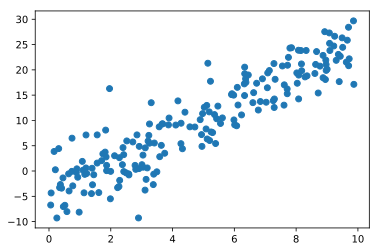

In [42]:
rng = np.random.RandomState(42)

x = 10 * rng.rand(200)
y = 3 * x  -5 + 4*rng.randn(200)

plt.scatter(x, y)

#### Solução analitica
 $w = (X^T X)^{-1} X^T y$
 
Para solução da derivação [clique aqui](https://stats.stackexchange.com/questions/46151/how-to-derive-the-least-square-estimator-for-multiple-linear-regression) 
<br>


Onde:
- w é o **vetor** de pesos (nossos parâmetros estimados)
- X é a matriz de valores, onde cada linha é uma observação e cada coluna é uma variável
- o Sobrescrito T indica "Transposto", ou seja, a matriz com um T é a matriz transposta.
- y é simplesmente o vetor da variável y.

#### Calculando o intercepto $b$ e a inclinação $a$ pela Solução Analítica (método raiz).

In [43]:
X = x[:, np.newaxis]

# Um ponto importante aqui é adicionar uma coluna de "1s" que será nosso intercepto.
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1]

print('Intercepto: %.2f' % b)
print('Inclinação: %.2f' % w1)

Intercepto: -4.58
Inclinação: 2.97


#### Agora utilizando o Sklearn.Linar_Model

Intercepto beta_0:  -4.57919539616
Inclinação beta_1:  2.96877157273


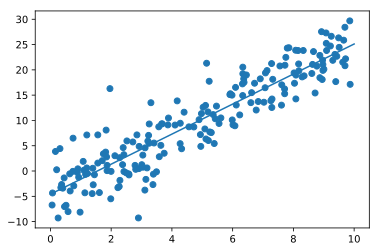

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yhat = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yhat)

print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

#### Qualidade do Ajuste

#### Erros Quadraticos Médios 
(MSE, Mean Squared Error)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y_i}\big)^2$$

- Note que o MSE é dependente da escala, e retorna $unidade^2$



In [45]:
# Calculando os valores preditos pelo método raiz e calculando os Erros Quadráticos Médios

y_predicted = x*w1 + b
mse = np.mean((y - y_predicted)**2)
mse

14.941219212655675

In [46]:
# Extraindo a raiz quadrada para obter a resposta na mesma unidade de medida

# R = Root, Raiz
rmse = np.sqrt(mse)
rmse

3.8653873302239292

Text(0.5,0,'index')

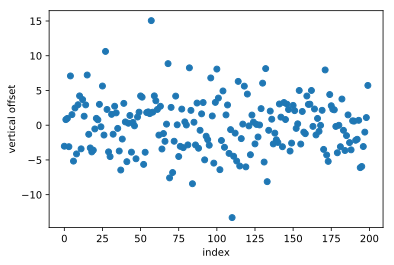

In [47]:
# Plotando a distribuição dos dados pelo respectivo erro em um gráfico de dispersão

plt.scatter(np.arange(x.shape[0]), y - y_predicted)
plt.ylabel('vertical offset')
plt.xlabel('index')

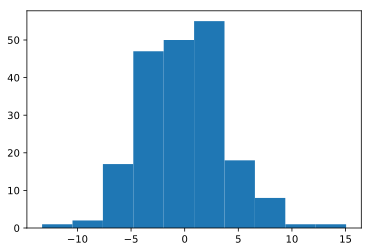

In [48]:
# Plotando a distribuição dos erros em um histograma

plt.hist(y - y_predicted, bins=10)
plt.show()

#### Coeficiente de Determinação 
ou $R^2$

- Soma total dos quadrados (variabilidade da variável resposta ou alvo, proporcional à variância do y):

$$SS_{total} = \sum_{i=1}^{n} \big( y_i - \bar{y_i} \big)^2$$

- Soma dos Residuos ao Quadrado:

$$SS_{residual} = \sum_{i=1}^{n} \big( \hat{y_i} - \bar{y_i} \big)^2$$

- Coeficiente de Determinação $R^2$:

$$R^2 = \frac{SS_{residual}}{SS_{total}}$$

In [49]:
# Método raiz
mean_y = np.mean(y)
SS_total = np.sum((y - mean_y)**2)
SS_residual = np.sum((y_predicted - mean_y)**2)
r_squared = SS_residual / SS_total
r_squared

0.83617434168057503

In [50]:
# método nutella
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
r_value**2

0.83617434168057392

## Analisando a relação entre Salário e Educação

<br>
<img src="img/ibge_sidra.png" width="350" />
<br>

Vamos testar uma hipótese. Será que estudar aumenta nossos salarios?

Vamos usar uma regressão de Salario ~ Estudo para nos ajudar a responder.

In [51]:
import pandas as pd
df = pd.read_csv(r'./data/data.csv')
df.head()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


### Primeiro vamos ver o Scatter plot e tentar inferir alguma relação

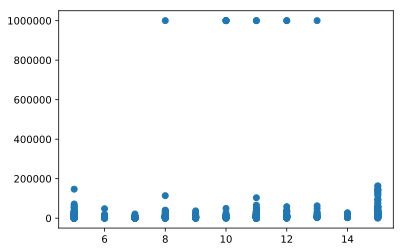

In [52]:
sample = df.dropna().sample(1000, random_state=7)
plt.scatter(sample['anos_estudo'], sample['salario'])

Dificil inferir algo desse grafico, mas já vemos que tem alguns outliners que não fazem muito sentido, vamos filtra-los.

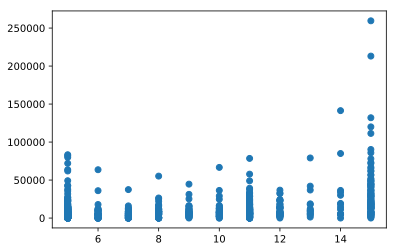

In [53]:
mascara_salario = df.salario<500000
sample = df[mascara_salario].dropna().sample(1000, random_state=7)

plt.scatter(sample['anos_estudo'], sample['salario'])

Analisando a correlação

In [54]:
sample[['anos_estudo','salario']].corr()

,anos_estudo,salario
anos_estudo,1.00000,0.32395
salario,0.32395,1.00000


Legal! Correlação de 0.3 responde nossa pergunta. Quanto mais estudo mais salario, além disso a taxa é de 30% de "transferência" entre estudo e salario. Está certo isso? Quais os problemas?

Vamos rodar uma regressão para ver as diferenças ..

In [58]:
model = LinearRegression(fit_intercept=True)

model.fit(sample['anos_estudo'][:, np.newaxis], sample['salario'])

xfit = np.linspace(0, 14, 100)
yhat = model.predict(xfit[:, np.newaxis])

print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

Intercepto beta_0:  -3296.26377672
Inclinação beta_1:  1707.80138646


In [59]:
model = LinearRegression(fit_intercept=True)

model.fit(sample['anos_estudo'][:, np.newaxis], sample['salario'])

xfit = np.linspace(0, 14, 100)
yhat = model.predict(xfit[:, np.newaxis])

print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

Intercepto beta_0:  -3296.26377672
Inclinação beta_1:  1707.80138646


In [60]:
print("R^2: ", model.score(sample['anos_estudo'][:, np.newaxis], sample['salario']))

R^2:  0.104943859167


Utilizando o método Scipy.Stats.Linregress

In [68]:
# método nutella
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(sample['anos_estudo'], sample['salario'])

In [69]:
print ('Inclinação:', slope)
print ('Intercepto:', intercept)
print ('R-quadrado:', r_value**2)

Inclinação: 1707.80138646
Intercepto: -3296.26377672
R-quadrado: 0.104943859167
